In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hpi = pd.DataFrame(pd.read_csv('hpi_final.csv'))
cpb = pd.DataFrame(pd.read_csv('cpb_final.csv'))
bps = pd.DataFrame(pd.read_csv('building_permits_final.csv'))
pop = pd.DataFrame(pd.read_csv('Population_Change.csv'))
inc = pd.DataFrame(pd.read_csv('county_income.csv'))

In [3]:
pop = pop[['pop_chg_yoy','Id2', 'year','one_year', 'two_years', 'three_years', 'four_years', 'five_years']]

pop.one_year = pop.one_year.shift(-1)
pop.two_years = pop.two_years.shift(-2)
pop.three_years = pop.three_years.shift(-3)
pop.four_years = pop.four_years.shift(-4)
pop.five_years = pop.five_years.shift(-5)
pop = pop.rename(columns = {
    'Id2': 'county_code',
    'one_year': 'one_year_pop',
    'two_years': 'two_years_pop',
    'three_years': 'three_years_pop',
    'four_years': 'four_years_pop',
    'five_years': 'five_years_pop'
})

In [4]:
inc = inc[['county_code', 'year', 'hh_income']]

gb = inc.groupby(['county_code', 'year']).mean()


def percent_change(gb):
    gb['one_year_inc']=gb['hh_income'].pct_change(periods=1).shift(-1)
    gb['two_years_inc']=gb['hh_income'].pct_change(periods=2).shift(-2)
    gb['three_years_inc']=gb['hh_income'].pct_change(periods=3).shift(-3)
    gb['four_years_inc']=gb['hh_income'].pct_change(periods=4).shift(-4)
    gb['five_years_inc']=gb['hh_income'].pct_change(periods=5).shift(-5)
    
    return gb

inc = gb.groupby(level=0).apply(percent_change)

inc.head()

hh_income  one_year_inc  two_years_inc  three_years_inc  \
county_code year                                                            
1001        2007      18275      0.005363       0.000711         0.078960   
            2008      18373     -0.004626       0.073205         0.088445   
            2009      18288      0.078193       0.093504         0.090004   
            2010      19718      0.014200       0.010954         0.017902   
            2011      19998     -0.003200       0.003650         0.015302   

                  four_years_inc  five_years_inc  
county_code year                                  
1001        2007        0.094282        0.090780  
            2008        0.084962        0.092418  
            2009        0.097496        0.110236  
            2010        0.029719        0.034385  
            2011        0.019902        0.040104

In [5]:
hpi = hpi[['county', 'year', 'hpi','one_year', 'two_years', 'three_years',
       'four_years', 'five_years'
          ]]
bps = bps[['date', 'county_code', 'single_units', 'total_units']]
cpb = cpb[['county_code', 'year', 'EMP', 'ESTAB', 'PAYANN',
           'one_year_emp',
       'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay'
          ]]
hpi.rename(columns={'county': 'county_code'}, inplace=True)
bps.rename(columns={'date': 'year'}, inplace=True)

In [6]:
df = pd.merge(hpi, cpb, how='inner', on=['county_code', 'year'])

df1 = pd.merge(df, bps, how='inner', on=['county_code', 'year'])

df2 = pd.merge(df1, pop, how='inner', on = ['county_code', 'year'])

df3 = pd.merge(df2, inc.reset_index(), how="inner", on = ['county_code', 'year'])

In [7]:
df3 = df3.replace([np.inf, -np.inf], np.nan)
df3 = df3.dropna()
df3.head(100)

,county_code,year,hpi,one_year,two_years,three_years,four_years,five_years,EMP,ESTAB,...,two_years_pop,three_years_pop,four_years_pop,five_years_pop,hh_income,one_year_inc,two_years_inc,three_years_inc,four_years_inc,five_years_inc
0,10001,2010,162.912258,-0.066988,-0.093230,-0.094294,-0.079433,-0.055848,46405,3200,...,0.026590,0.037274,0.052180,0.062434,57396,0.004060,0.007318,0.019653,0.030420,0.055317
1,10001,2011,151.999032,-0.028126,-0.029266,-0.013338,0.011940,0.075964,48100,3177,...,0.023816,0.038529,0.048650,0.057124,57629,0.003245,0.015530,0.026254,0.051051,0.078277
7,10003,2010,254.485304,-0.074193,-0.112385,-0.099903,-0.077459,-0.045919,255149,15655,...,0.011343,0.017880,0.022461,0.027671,198499,0.007169,0.010675,0.011285,0.015335,0.018988
8,10003,2011,235.604188,-0.041252,-0.027770,-0.003527,0.030540,0.071850,251479,15448,...,0.012027,0.016582,0.021762,0.024982,199922,0.003481,0.004087,0.008108,0.011735,0.013015
14,10005,2010,186.944286,-0.051298,-0.073395,-0.074405,-0.022421,-0.045963,56833,5363,...,0.026020,0.042124,0.062646,0.084572,75744,-0.006047,-0.001347,0.009242,0.034551,0.071808
15,10005,2011,177.354490,-0.023292,-0.024357,0.030438,0.005623,0.044466,57764,5313,...,0.029313,0.049582,0.071239,0.094493,75286,0.004729,0.015381,0.040844,0.078328,0.107603
21,1001,2010,144.054167,-0.033841,-0.039412,-0.048072,-0.032979,-0.022625,10167,871,...,0.003324,-0.000749,0.002228,0.001534,19718,0.014200,0.010954,0.017902,0.029719,0.034385
22,1001,2011,139.179167,-0.005766,-0.014729,0.000892,0.011610,0.035944,10290,835,...,-0.008966,-0.006014,-0.006702,0.000616,19998,-0.003200,0.003650,0.015302,0.019902,0.040104
28,1003,2010,178.720000,-0.059471,-0.061642,-0.043345,0.044284,0.080639,51171,4665,...,0.038403,0.064305,0.087805,0.108590,69476,0.018438,0.047139,0.054796,0.051557,0.066613
29,1003,2011,168.091333,-0.002308,0.017145,0.110316,0.148969,0.207500,51386,4624,...,0.044741,0.067809,0.088212,0.113498,70757,0.028181,0.035700,0.032520,0.047303,0.062072


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


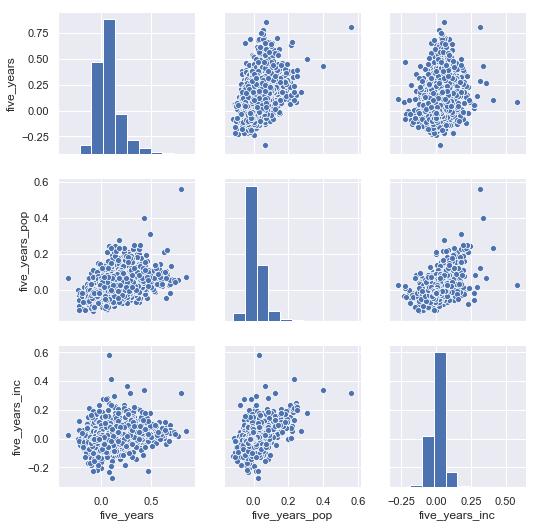

In [8]:
sns.set()
cols = ['five_years','five_years_pop', 'five_years_inc']
sns.pairplot(df3[cols], size = 2.5)
plt.show();

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


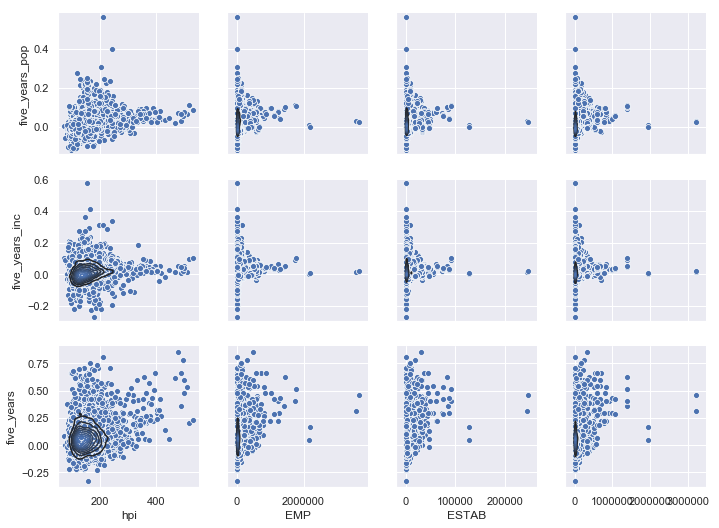

In [15]:
g = sns.pairplot(df3, 
             y_vars=['five_years_pop', 'five_years_inc', 'five_years'],
             x_vars=['hpi', 'EMP', 'ESTAB', 'hh_income'])
g.map_lower(sns.kdeplot)
g.map_upper(sns.kdeplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


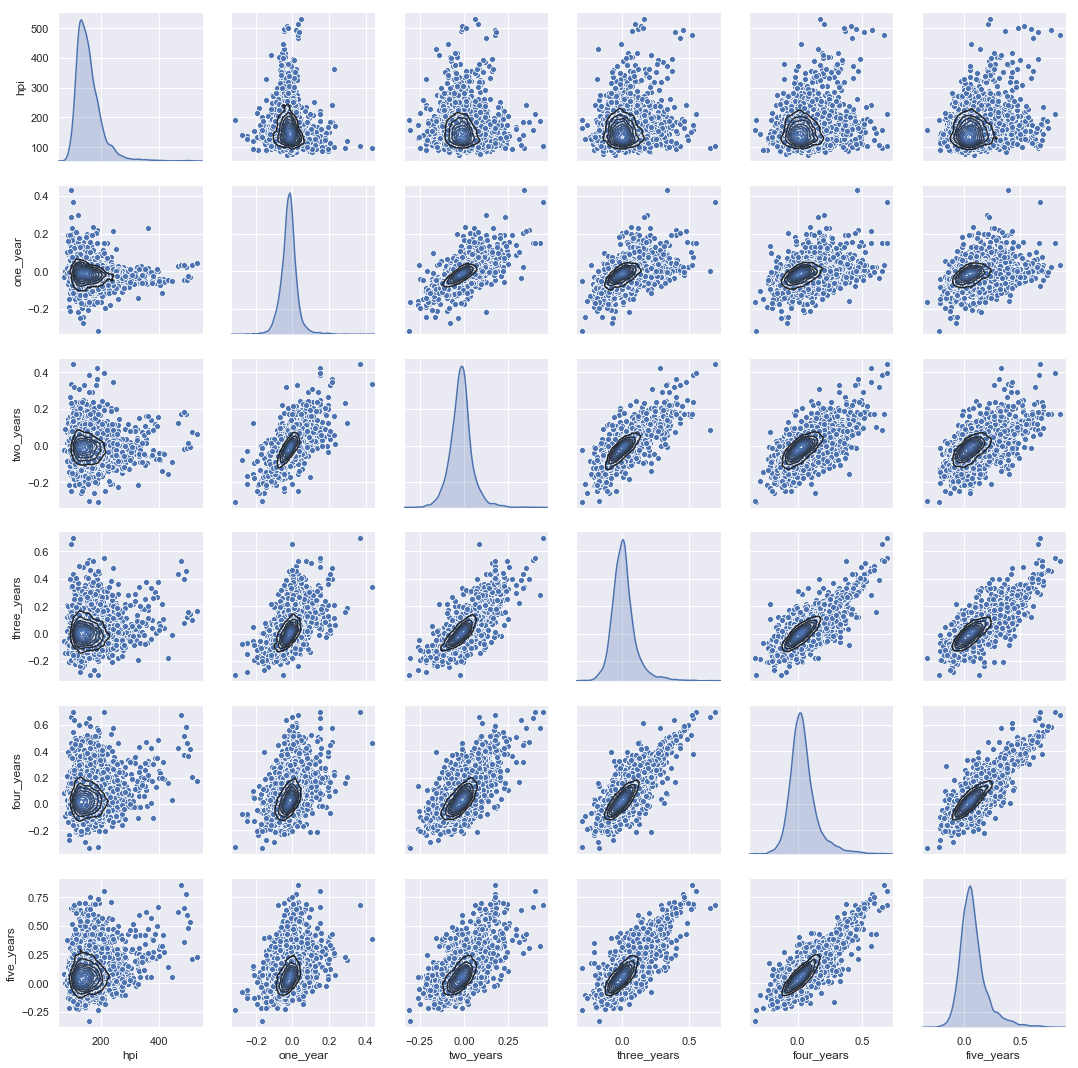

In [11]:
g1 = sns.pairplot(df3, vars=['hpi','one_year', 'two_years','three_years', 'four_years', 'five_years'], 
                 diag_kind='kde')
g1.map_lower(sns.kdeplot)
g1.map_upper(sns.kdeplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


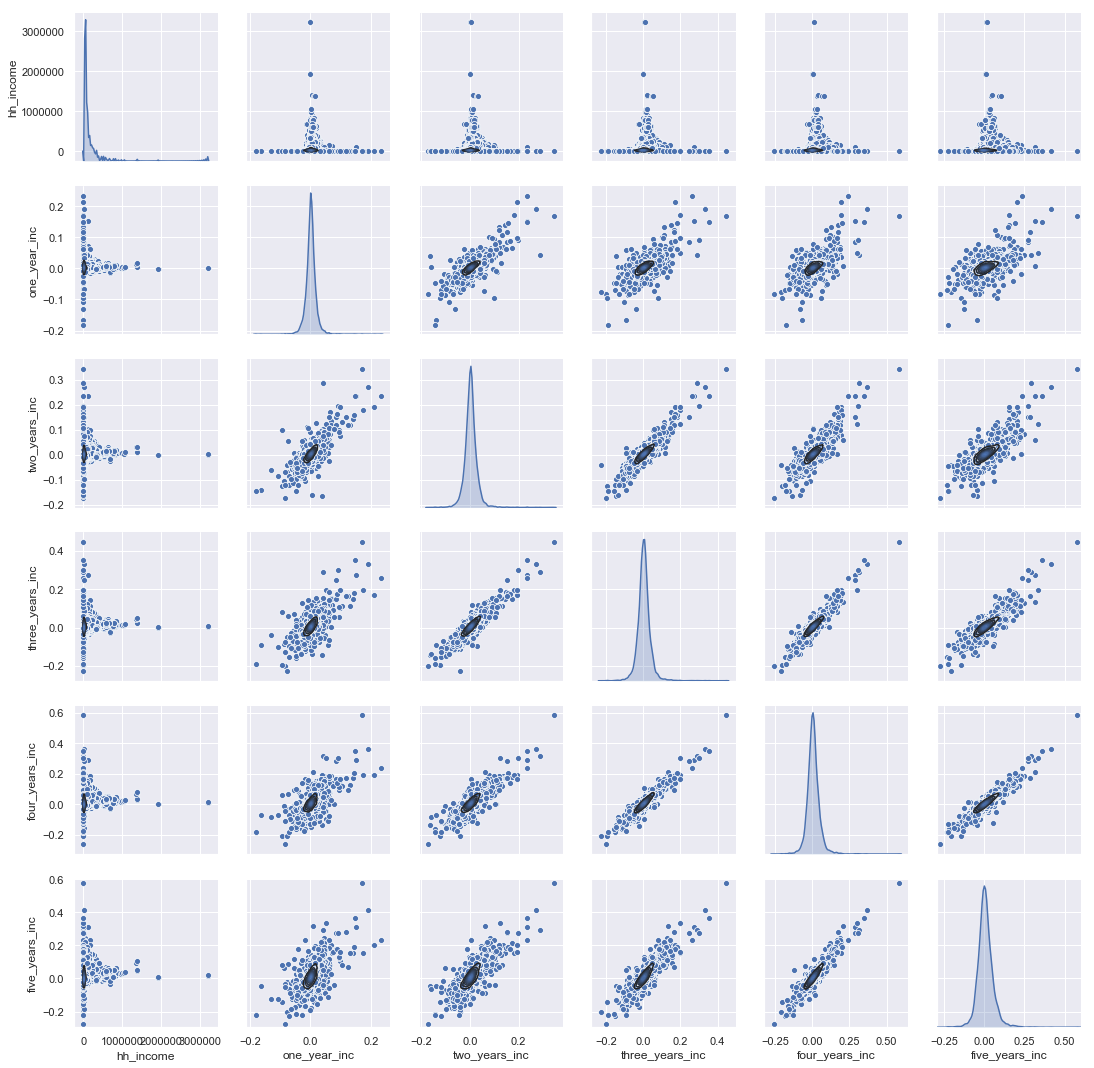

In [13]:
g2 = sns.pairplot(df3, vars=['hh_income','one_year_inc', 'two_years_inc','three_years_inc', 'four_years_inc', 'five_years_inc'], 
                 diag_kind='kde')
g2.map_lower(sns.kdeplot)
g2.map_upper(sns.kdeplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


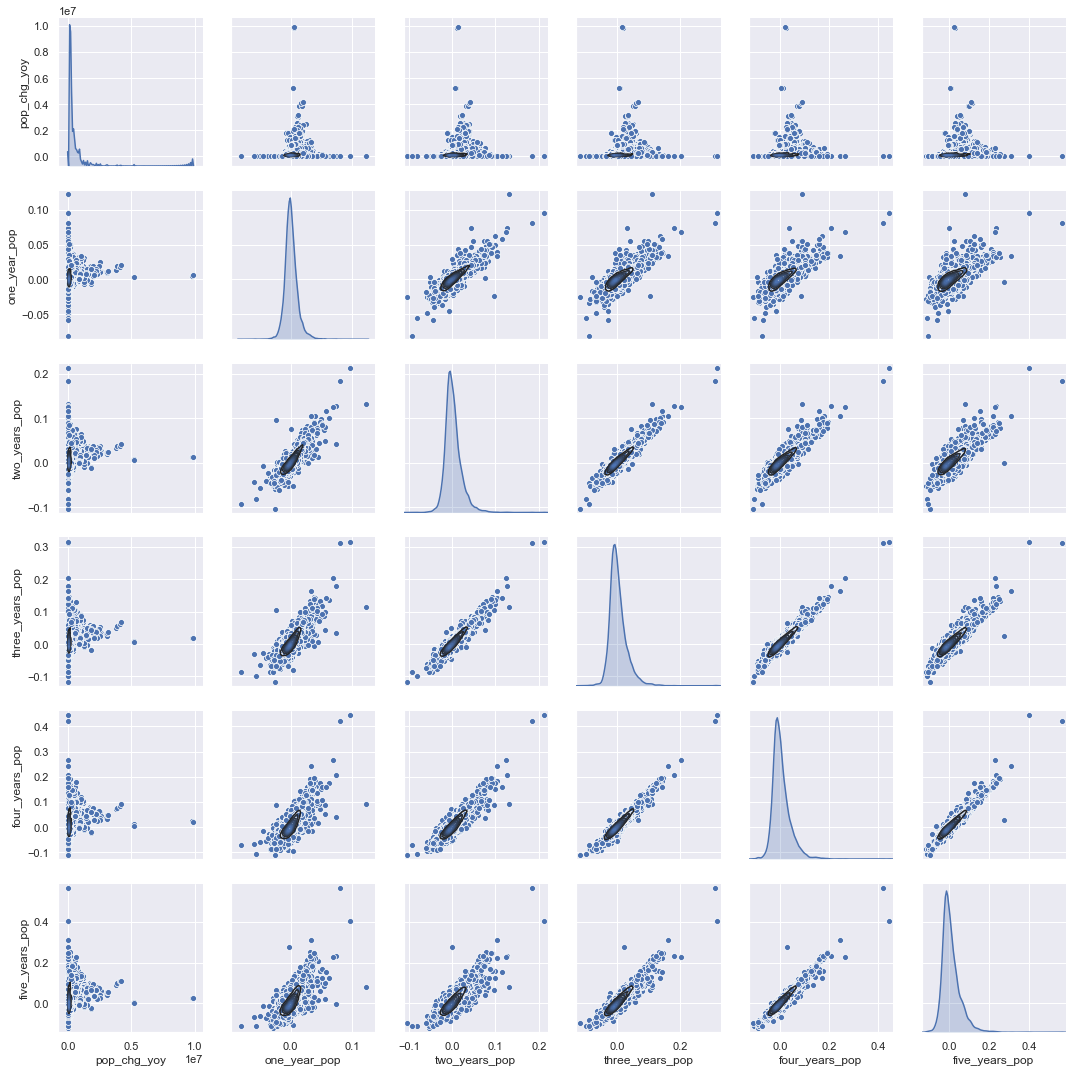

In [14]:
g3 = sns.pairplot(df3, vars=['pop_chg_yoy','one_year_pop', 'two_years_pop','three_years_pop', 'four_years_pop', 'five_years_pop'], 
                 diag_kind='kde')
g3.map_lower(sns.kdeplot)
g3.map_upper(sns.kdeplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


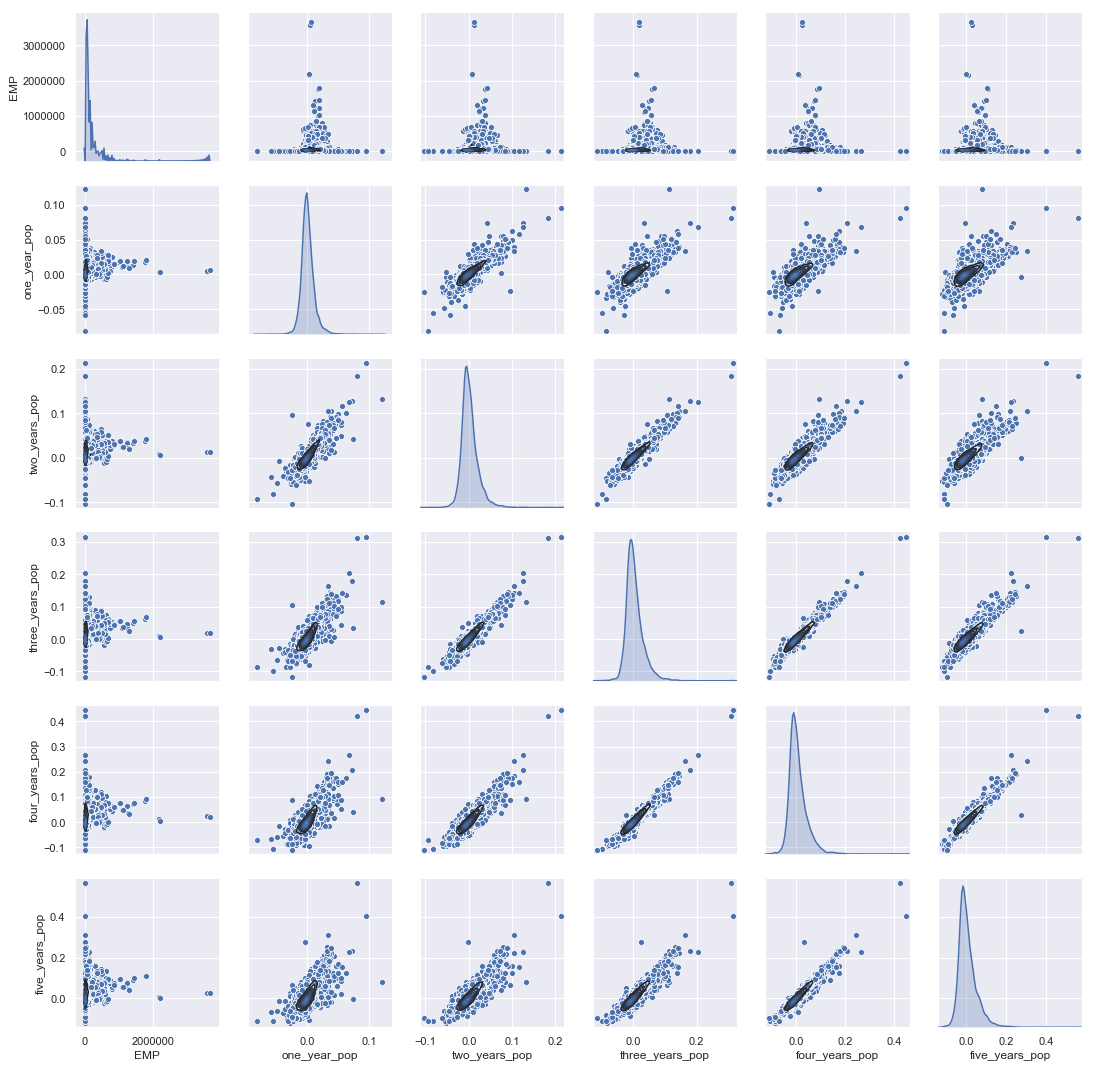

In [18]:
g4 = sns.pairplot(df3, vars=['EMP','one_year_pop', 'two_years_pop','three_years_pop', 'four_years_pop', 'five_years_pop'], 
                 diag_kind='kde')
g4.map_lower(sns.kdeplot)
g4.map_upper(sns.kdeplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


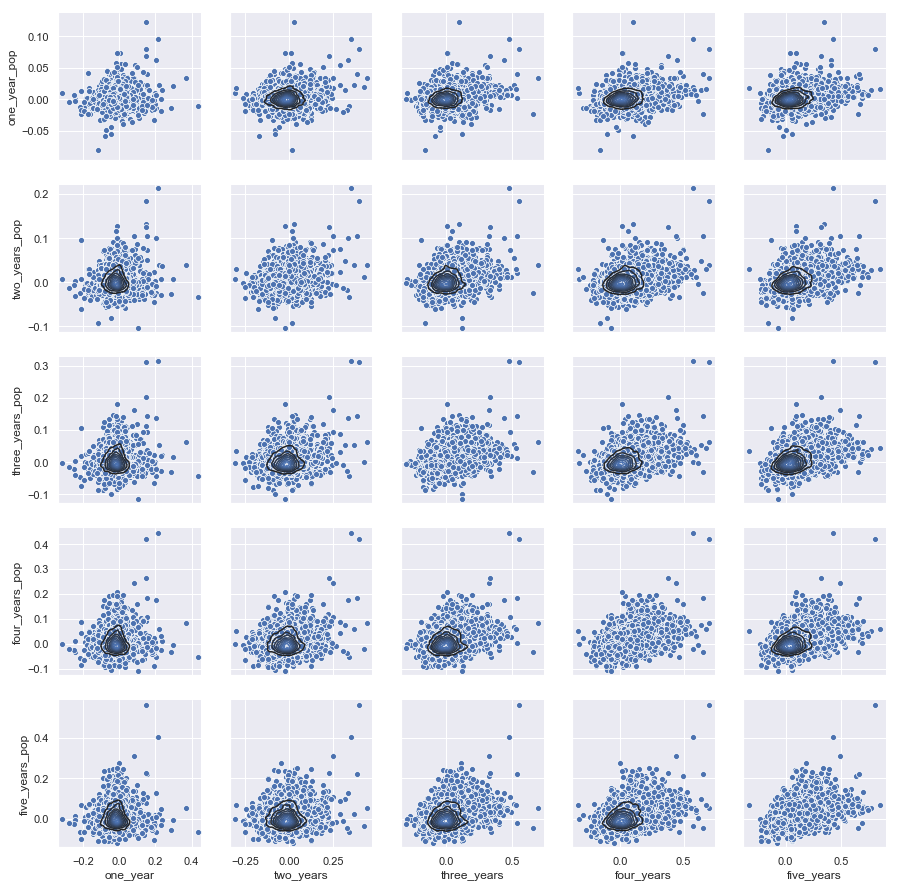

In [19]:
g5 = sns.pairplot(df3, 
                  x_vars=['one_year', 'two_years','three_years', 'four_years', 'five_years'],
                  y_vars=['one_year_pop', 'two_years_pop','three_years_pop', 'four_years_pop', 'five_years_pop'], 
                 )
g5.map_lower(sns.kdeplot)
g5.map_upper(sns.kdeplot)



# Machine Learning: Linear Regression

In [ ]:
X = df3[[
    'EMP', 'ESTAB', 'PAYANN', 'single_units', 'total_units',
    'one_year_emp', 'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay',
         'one_year_pop', 'one_year_inc', 'two_years_inc',
    'three_years_inc','four_years_inc','five_years_inc',
        'two_years_pop', 'three_years_pop', 'four_years_pop',
    'five_years_pop', 'hh_income']].values

l = [1.14383044e+01 5.14469879e+00 3.81888392e+00 2.50210240e+00
 1.82401920e+00 1.28582056e+00 9.11751486e-01 6.39934740e-01
 5.87864763e-01 4.69710199e-01 4.35471351e-01 3.46161050e-01
 2.63954143e-01 2.04374344e-01 1.99134938e-01 1.86972212e-01
 1.54114624e-01 1.00453651e-01 9.14101373e-02 7.14516724e-02
 6.29874665e-02 5.26596066e-02 5.01520236e-02 4.87752355e-02
 3.42196138e-02 3.16975608e-02 2.16271517e-02 1.27987425e-02
 1.15001740e-02 4.56579480e-03 5.24164182e-04]

y = df3[['five_years']].values

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

In [ ]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")


In [ ]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
#     linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
    linear_model.ARDRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train_scaled, y_train_scaled)
    r2 = clf.score(X_test_scaled, y_test_scaled)
    print(f'r2 score: {r2}')
    print('----------------------------------------------------------------------')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=31)
pca.fit(X_train_scaled)
print(pca.)
print('-----------------------------------------')
print(pca.explained_variance_)

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
print("original shape:   ", X_train_scaled.shape)
print("transformed shape:", X_pca.shape)

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0],X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=31)
Y_sklearn = sklearn_pca.fit_transform(X_train_scaled)

In [ ]:
pca = sklearn_pca.fit(X_train_scaled)
print("")
print('-----------------------------------------')
print(pca.explained_variance_)

# Deep Learning

In [401]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras.layers import Dense, Dropout, Flatten

In [422]:
X = df3[[
    'EMP', 'ESTAB', 'PAYANN', 'single_units', 'total_units','hh_income','pop_chg_yoy',
    'one_year_pop', 'two_years_pop','three_years_pop', 'four_years_pop', 'five_years_pop',
    'one_year_emp', 'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay',
         'one_year_pop', 'one_year_inc', 'two_years_inc',
    'three_years_inc','four_years_inc','five_years_inc',
        'two_years_pop', 'three_years_pop', 'four_years_pop',
    'five_years_pop', 'hh_income']].values

y = df3[['five_years']].values

print(X.shape, y.shape)

(5107, 38) (5107, 1)


In [423]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [418]:
deep_model = Sequential()

In [419]:
deep_model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [420]:
deep_model.add(Dense(100, activation='relu'))

In [421]:
deep_model.add(Dense(y_train.shape[1], activation='softmax'))

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [424]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [425]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [426]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [427]:
y_train_categorical

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [520]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

deep_model = Sequential()
# deep_model.add(Dropout(rate=0.2, input_shape=(38,)))
deep_model.add(Dense(units=6, activation='relu', input_dim=38))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=1, activation='linear'))

In [521]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 6)                 234       
_________________________________________________________________
dense_147 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 7         
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [525]:
deep_model.compile(optimizer='adam',
                  loss='mean_absolute_error',
                   metrics=['mae'])

In [526]:
deep_model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.33, 
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 2566 samples, validate on 1264 samples
Epoch 1/100
 - 1s - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.0770 - val_mean_absolute_error: 0.0770
Epoch 2/100
 - 0s - loss: 0.0695 - mean_absolute_error: 0.0695 - val_loss: 0.0760 - val_mean_absolute_error: 0.0760
Epoch 3/100
 - 0s - loss: 0.0693 - mean_absolute_error: 0.0693 - val_loss: 0.0758 - val_mean_absolute_error: 0.0758
Epoch 4/100
 - 0s - loss: 0.0693 - mean_absolute_error: 0.0693 - val_loss: 0.0759 - val_mean_absolute_error: 0.0759
Epoch 5/100
 - 0s - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.0760 - val_mean_absolute_error: 0.0760
Epoch 6/100
 - 0s - loss: 0.0693 - mean_absolute_error: 0.0693 - val_loss: 0.0759 - val_mean_absolute_error: 0.0759
Epoch 7/100
 - 0s - loss: 0.0697 - mean_absolute_error: 0.0697 - val_loss: 0.0747 - val_mean_absolute_error: 0.0747
Epoch 8/100
 - 0s - loss: 0.0691 - mean_absolute_error: 0.0691 - val_loss: 0.0762 - val_mean_absolute_error: 0.0762
Epoch 9/100
 - 0s - loss

Epoch 71/100
 - 0s - loss: 0.0678 - mean_absolute_error: 0.0678 - val_loss: 0.0737 - val_mean_absolute_error: 0.0737
Epoch 72/100
 - 0s - loss: 0.0679 - mean_absolute_error: 0.0679 - val_loss: 0.0736 - val_mean_absolute_error: 0.0736
Epoch 73/100
 - 0s - loss: 0.0677 - mean_absolute_error: 0.0677 - val_loss: 0.0743 - val_mean_absolute_error: 0.0743
Epoch 74/100
 - 0s - loss: 0.0673 - mean_absolute_error: 0.0673 - val_loss: 0.0752 - val_mean_absolute_error: 0.0752
Epoch 75/100
 - 0s - loss: 0.0673 - mean_absolute_error: 0.0673 - val_loss: 0.0737 - val_mean_absolute_error: 0.0737
Epoch 76/100
 - 0s - loss: 0.0673 - mean_absolute_error: 0.0673 - val_loss: 0.0751 - val_mean_absolute_error: 0.0751
Epoch 77/100
 - 0s - loss: 0.0675 - mean_absolute_error: 0.0675 - val_loss: 0.0735 - val_mean_absolute_error: 0.0735
Epoch 78/100
 - 0s - loss: 0.0679 - mean_absolute_error: 0.0679 - val_loss: 0.0738 - val_mean_absolute_error: 0.0738
Epoch 79/100
 - 0s - loss: 0.0676 - mean_absolute_error: 0.0676 

In [510]:
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled, y_test, verbose=2)

ValueError: too many values to unpack (expected 2)

In [ ]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [527]:
y_test

array([[0.18584276],
       [0.35557379],
       [0.02591733],
       ...,
       [0.31958569],
       [0.00054631],
       [0.05657451]])

In [528]:
deep_model.predict(X_test_scaled)

array([[ 0.10687967],
       [ 0.02494286],
       [-0.03217018],
       ...,
       [ 0.06565167],
       [ 0.02158246],
       [ 0.06853572]], dtype=float32)

In [529]:
len(X_train)

3830

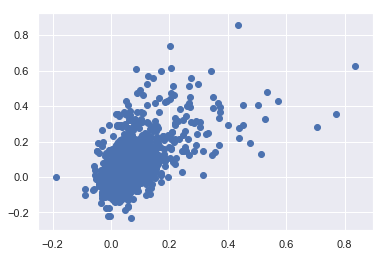

In [530]:
plt.scatter(deep_model.predict(X_test_scaled), y_test)

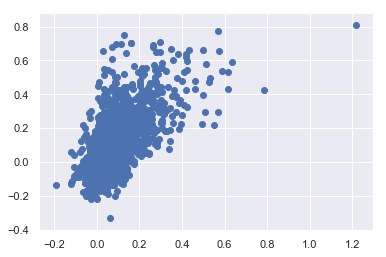

In [531]:
plt.scatter(deep_model.predict(X_train_scaled), y_train)

In [532]:
y_train

array([[-0.05945875],
       [-0.01580237],
       [-0.01264849],
       ...,
       [ 0.07166541],
       [ 0.08637464],
       [ 0.07040997]])

In [533]:
sklearn.metrics.r2_score(y_train, deep_model.predict(X_train_scaled))

0.38027179366704655

In [534]:
sklearn.metrics.r2_score(y_test, deep_model.predict(X_test_scaled))

0.29602602302993886

In [518]:
len(y_train)

3830

In [519]:
len(y_test)

1277